In [1]:
import pandas as pd 
import numpy

import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss,classification_report
import mlrose_hiive
from sklearn.neural_network import MLPClassifier
import warnings
import numpy as np
import time
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
def water_quality():
    data = pd.read_csv('water_potability.csv',header=0) 
    encoder = LabelEncoder()
    imputer = SimpleImputer(strategy="mean")
    water_med = imputer.fit_transform(data)
    water_data_clean = pd.DataFrame(water_med, columns=data.columns)
    
    water_X = water_data_clean.iloc[:,:-1]
    y = water_data_clean.iloc[:,-1]
    
    scale = StandardScaler()
    X = scale.fit_transform(water_X)
    

    x_train,x_test,ytrain,ytest = train_test_split(X,y,test_size=.20, random_state=42)
    
    return x_train,x_test,ytrain,ytest

In [3]:
def neuralNetwork(x_train,x_test,y_train,y_test):
    start_time = time.time()

    skLearnNN = MLPClassifier(random_state=42,
                              activation='relu',
                              alpha=0.0001,
                              hidden_layer_sizes= (100),
                              max_iter=100,
                              solver='adam')
    
    skLearnNN.fit(x_train,x_test)
    
    print(" It took %s seconds " % (time.time() - start_time))
    
    prediction = skLearnNN.predict(y_train)
    
    x_train,x_test,y_train,y_test
    
    print("Xtrain",x_train)
    print("X_test",x_test)
    print("Y_train",y_train)
    print("y_test",y_test)
    
    print(log_loss(y_test, prediction))
    print(log_loss(x_test,skLearnNN.predict(x_train)))
    
    
    
    return "The accuracy score = " + str(accuracy_score(y_test,prediction))

In [5]:
x_train,x_test,y_train,y_test = water_quality()

neuralNetwork(x_train,y_train,x_test,y_test)

 It took 1.1616871356964111 seconds 
Xtrain [[-0.31106424  0.20260677 -0.55283024 ...  0.4926538  -0.08720889
  -1.3477761 ]
 [-0.26950143 -0.07691512  1.38505418 ... -1.65259384  0.01668367
   0.08186168]
 [-0.1665165   0.28283788 -0.42120077 ... -0.1439227   0.27385062
   1.26331981]
 ...
 [-0.30647139 -0.29227326  1.01798723 ... -0.1418567   1.29106439
  -0.61030501]
 [ 1.15828844  0.65896618 -0.6650338  ...  0.62568457 -1.22374139
   0.39390641]
 [-0.26034729  0.05830532  1.4442152  ... -0.63739737  0.
  -0.26735401]]
X_test 233     0.0
831     0.0
2658    0.0
2495    0.0
2603    0.0
       ... 
1095    1.0
1130    1.0
1294    0.0
860     0.0
3174    1.0
Name: Potability, Length: 2620, dtype: float64
Y_train [[-6.04313345e-16 -3.90828578e-01 -1.77118587e-01 ...  1.78194369e+00
   3.95504231e-02  1.17889387e+00]
 [-2.97765791e-01 -2.26798881e-01  1.23867225e+00 ...  1.27534403e-01
   9.18698769e-02  7.63090493e-01]
 [ 5.20682431e-01  8.42269123e-01  1.42578340e-01 ... -2.65515070e-0

'The accuracy score = 0.6737804878048781'

# Randomized hill climbing


In [27]:
def randomized_hill_climbing(x_train,x_test,y_train,y_test):
    start_time = time.time()
    hidden_nodes = [[10],[100],[1000]]
    logloss = []
    accuracy_list = []
    
    for i in hidden_nodes:
        print("Hidden Layer = ", i)
        mlrose_nn = mlrose_hiive.NeuralNetwork(hidden_nodes = i,
                                                       activation = 'relu',
                                                       algorithm='random_hill_climb',
                                                       max_iters=1000,
                                                       bias = False,
                                                       learning_rate = 0.0001,
                                                       restarts = 5,
                                                       early_stopping=True,
                                                       clip_max = 5,
                                                       max_attempts=100,
                                                       is_classifier = True,
                                                       curve=True,
                                                       random_state=42,
                                                  )
    
        mlrose_nn.fit(x_train,x_test)
        prediction = mlrose_nn.predict(y_train)
            

            
        print(" It took %s seconds " % (time.time() - start_time))
        print("The accuracy score = " + str(accuracy_score(y_test,prediction)))
        print("The Log loss = ", log_loss(y_test, prediction))
        accuracy_list.append(accuracy_score(y_test,prediction))
        logloss.append(log_loss(y_test, prediction))
        
    plt.plot(mlrose_nn.fitness_curve)
    plt.title('Fitness Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Logloss')
    plt.savefig('Random_hill_clibming_Fitness_Curve.png',format='png',bbox_inches = "tight")
    plt.show() 
    
    return accuracy_list,logloss
    

Hidden Layer =  [10]
 It took 10.642664909362793 seconds 
The accuracy score = 0.49847560975609756
The Log loss =  17.322236232788576
Hidden Layer =  [100]
 It took 51.87153100967407 seconds 
The accuracy score = 0.5259146341463414
The Log loss =  16.374491775720834
Hidden Layer =  [1000]
 It took 350.707466840744 seconds 
The accuracy score = 0.5762195121951219
The Log loss =  14.637015527829623


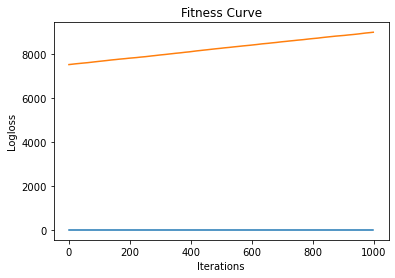

In [28]:
accuary,logloss = randomized_hill_climbing(x_train,y_train,x_test,y_test)

In [39]:
def plotFigures(accuary,logloss,problem):
    hidden_nodes = [10,100,1000]
    fig, axs = plt.subplots(2)
    
    fig.suptitle('Water Potablity' + problem)
    axs[0].set(xlabel='Learning Rate', ylabel='Accuracy')
    print(hidden_nodes)
    print(accuary)
    axs[0].plot(hidden_nodes, accuary,'tab:orange')
    
    axs[1].plot(hidden_nodes,logloss,'tab:blue') 
    axs[1].set(xlabel='Learning Rate', ylabel='Log Loss')
    print(hidden_nodes)
    print(logloss)


            
    plt.savefig('waterPotablity '+problem+'.png',format='png',bbox_inches = "tight")         
    plt.show()
    return 
    

[10, 100, 1000]
[0.49847560975609756, 0.5259146341463414, 0.5762195121951219]
[10, 100, 1000]
[17.322236232788576, 16.374491775720834, 14.637015527829623]


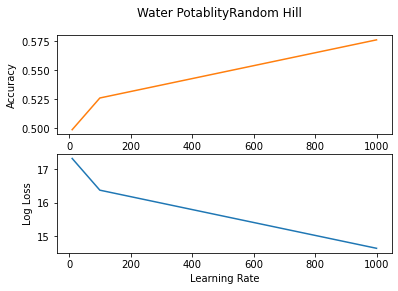

In [40]:
plotFigures(accuary,logloss,"Random Hill")

# Simulated Annealing

In [35]:
def simulated_annealing(x_train,x_test,y_train,y_test):
    start_time = time.time()
    hidden_nodes = [[10],[100],[1000]]
    logloss = []
    accuracy_list = []
    for i in hidden_nodes:
        mlrose_nn = mlrose_hiive.NeuralNetwork(hidden_nodes=i,
                                               activation = 'relu',
                                               bias = False,
                                               restarts = 5,
                                               clip_max = 5,
                                               max_iters=1000,
                                               max_attempts=100,
                                               is_classifier = True,
                                               curve=True,
                                               random_state=42,
                                               algorithm='simulated_annealing',
                                               learning_rate = 0.0001,
                                               early_stopping=True)
        mlrose_nn.fit(x_train,x_test)
        prediction = mlrose_nn.predict(y_train)
            

            
        print(" It took %s seconds " % (time.time() - start_time))
        print("The accuracy score = " + str(accuracy_score(y_test,prediction)))
        print("The Log loss = ", log_loss(y_test, prediction))
        accuracy_list.append(accuracy_score(y_test,prediction))
        logloss.append(log_loss(y_test, prediction))
        
    plt.plot(mlrose_nn.fitness_curve)
    plt.title('Fitness Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Logloss')
    plt.savefig('SA_Fitness_Curve.png',format='png',bbox_inches = "tight")
    plt.show() 
    return accuracy_list,logloss


 It took 2.422128200531006 seconds 
The accuracy score = 0.5
The Log loss =  17.269585659015846
 It took 11.657088041305542 seconds 
The accuracy score = 0.5259146341463414
The Log loss =  16.374491775720834
 It took 77.93087720870972 seconds 
The accuracy score = 0.5762195121951219
The Log loss =  14.637015527829623


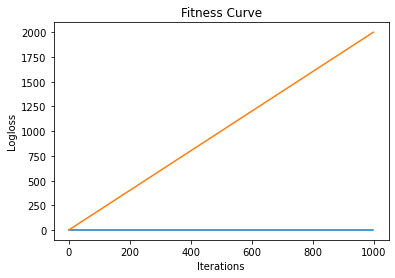

In [41]:
sa_accuary_list, sa_log_loss = simulated_annealing(x_train,y_train,x_test,y_test)

[10, 100, 1000]
[0.5, 0.5259146341463414, 0.5762195121951219]
[10, 100, 1000]
[17.269585659015846, 16.374491775720834, 14.637015527829623]


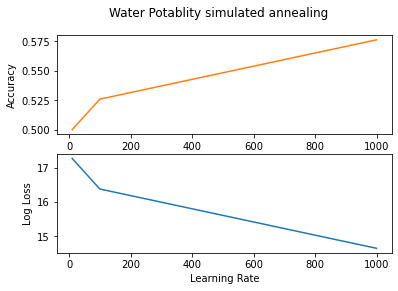

In [43]:

plotFigures(sa_accuary_list, sa_log_loss," simulated annealing")

# Genetic Algortihm

In [44]:
def genetic_algorithm(x_train,x_test,y_train,y_test):
    start_time = time.time()
    hidden_nodes = [[10],[100],[1000]]
    logloss = []
    accuracy_list = []
    for i in hidden_nodes:
        mlrose_nn = mlrose_hiive.NeuralNetwork(hidden_nodes=i,
                                               activation = 'relu',
                                               bias = False,
                                               restarts = 5,
                                               clip_max = 5,
                                               max_iters=1000,
                                               max_attempts=100,
                                               is_classifier = True,
                                               curve=True,
                                               random_state=42,
                                               algorithm='genetic_alg',
                                               learning_rate = 0.0001,
                                               early_stopping=True)
        mlrose_nn.fit(x_train,x_test)
        prediction = mlrose_nn.predict(y_train)
            
            
        print(" It took %s seconds " % (time.time() - start_time))
        print("The accuracy score = " + str(accuracy_score(y_test,prediction)))
        print("The Log loss = ", log_loss(y_test, prediction))
        accuracy_list.append(accuracy_score(y_test,prediction))
        logloss.append(log_loss(y_test, prediction))
        
    plt.plot(mlrose_nn.fitness_curve)
    plt.title('Fitness Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Logloss')
    plt.savefig('GA_Fitness_Curve.png',format='png',bbox_inches = "tight")
    plt.show() 
    return accuracy_list,logloss

 It took 122.29608821868896 seconds 
The accuracy score = 0.6310975609756098
The Log loss =  12.741525394795623
 It took 322.330943107605 seconds 
The accuracy score = 0.5213414634146342
The Log loss =  16.532523944341452
 It took 2617.3908290863037 seconds 
The accuracy score = 0.6371951219512195
The Log loss =  12.530885313850535


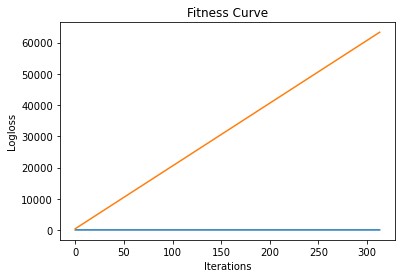

In [45]:
ga_accuracyList, ga_logloss = genetic_algorithm(x_train,y_train,x_test,y_test)

[10, 100, 1000]
[0.6310975609756098, 0.5213414634146342, 0.6371951219512195]
[10, 100, 1000]
[12.741525394795623, 16.532523944341452, 12.530885313850535]


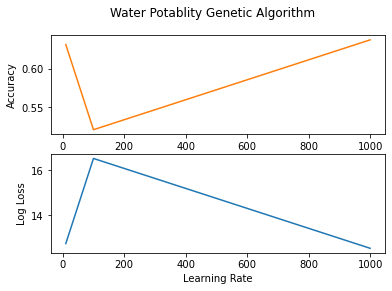

In [46]:

plotFigures(ga_accuracyList, ga_logloss," Genetic Algorithm")